Terrorism in America, 2001-Present

*Terrorist activity in United States and by Americans since 2001

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
%matplotlib inline

Now imagine that I am a data scientist wanting to examine the correlations and trends in data featuring terrorism in America since the 9/11 attack.

First I will load and read the data, then proceed to visualize the analysis to see clearly the results.

In [2]:
#read both files then use .info() to show columns in dataframes
plots = pd.read_csv('Downloads/archive/plots.csv').drop(['prevention_method', 'attack_date'], axis=1)
suspects = pd.read_csv('Downloads/archive/suspects.csv')
suspects = pd.DataFrame(suspects, columns=['suspect_ID', 'age', 'sex', 'marital_status', 
                                           'plot_ID', 'military_target', 'online_radicalization'])
plots.info()
suspects.info()

#will use the suspects dataframe for analysis because has good amount of continous data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plot_ID          205 non-null    float64
 1   plot_name        216 non-null    object 
 2   plot_ideology    215 non-null    object 
 3   plot_status      195 non-null    object 
 4   victims_wounded  202 non-null    float64
 5   victims_killed   212 non-null    float64
dtypes: float64(3), object(3)
memory usage: 10.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   suspect_ID             396 non-null    int64  
 1   age                    386 non-null    float64
 2   sex                    396 non-null    object 
 3   marital_status         396 non-null    object 
 4   plot_ID                340 non-null    object 
 5   mi

In [3]:
#to see the continuous data
suspects.describe()

,suspect_ID,age
count,396.000000,386.000000
mean,198.618687,28.790155
std,114.653837,9.506526
min,1.000000,15.000000
25%,99.750000,22.000000
50%,198.500000,26.000000
75%,297.250000,32.750000
max,398.000000,76.000000


Considering the data above I see that the ages column has a continuous data that I can compare to a binary data. One column is "online_radicalization" (yes or no), which presents the question "Is there a correlation between ages and online radicalization?"

In [4]:
#make sure there are no NaN values in age column so doesn't affect tests
suspects = suspects[suspects['age'].notna()]

#deleted 10 suspects with no age recorded

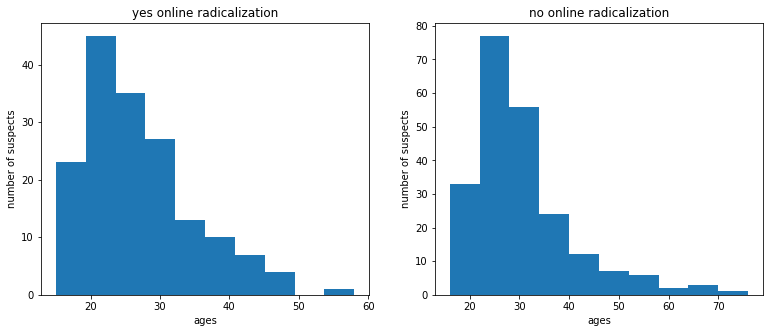

In [17]:
#divide data between yes and no online radicalization
yes = suspects[suspects['online_radicalization'] == 'Yes']
no = suspects[suspects['online_radicalization'] == 'No']

#to see the graphs side by side
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.xlabel('ages')
plt.ylabel('number of suspects')
plt.title('yes online radicalization')
plt.hist(yes['age'])
plt.subplot(1,3,2)
plt.xlabel('ages')
plt.ylabel('number of suspects')
plt.title('no online radicalization')
plt.hist(no['age'])

plt.show()

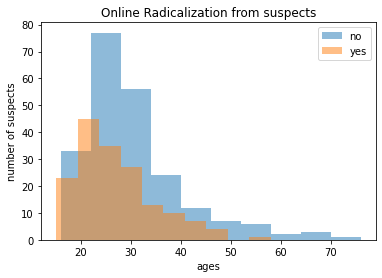

In [19]:
#show comparison histogram
plt.hist(no['age'], alpha=.5)
plt.hist(yes['age'], alpha=.5)
plt.legend(['no', 'yes'])
plt.xlabel('ages')
plt.ylabel('number of suspects')
plt.title('Online Radicalization from suspects')
plt.show()

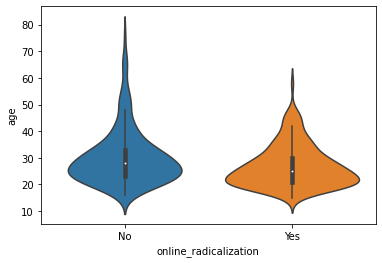

In [7]:
#violin plot illustration
#will show distributions side by side
sns.violinplot(x='online_radicalization', y='age', data=suspects)
plt.show()

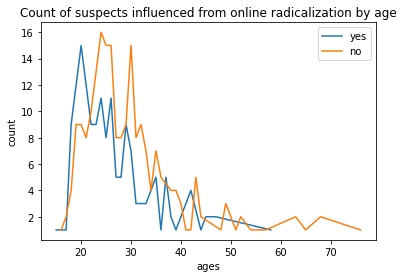

In [21]:
#linear plot to show other than histogram how the data changes through count
plt.plot(suspects.loc[suspects['online_radicalization'] == 'Yes'].groupby('age')['age'].count(), label='yes')
plt.plot(suspects.loc[suspects['online_radicalization'] == 'No'].groupby('age')['age'].count(), label='no')
plt.title('Count of suspects influenced from online radicalization by age')
plt.legend()
plt.xlabel('ages')
plt.ylabel('count')
plt.show()

In [10]:
#print stats.describe in order to see skewness and kurtosis
print('no online radicalization:')
print(stats.describe(no['age']))
print('yes online radicalization:')
print(stats.describe(yes['age']))

no online radicalization:
DescribeResult(nobs=221, minmax=(16.0, 76.0), mean=30.212669683257918, variance=108.43183874948582, skewness=1.6915570827939865, kurtosis=3.3095594909705888)
yes online radicalization:
DescribeResult(nobs=165, minmax=(15.0, 58.0), mean=26.884848484848487, variance=60.3220251293422, skewness=1.1447124264966042, kurtosis=1.1141082167812701)


It seems that both "Yes online radicalization" and "No online radicalization" illustrate on the histogram more data is towards the y axis and the rest tailing out towards the right. The skewness and kurtosis described above support this observation, giving me an impression that the data does not follow under a normal distribution. To be sure, I will perform two more tests in order to conclude on the normality of the graphs.

Depending on the conclusion of the next two tests will establish how to proceed further in order to determine if there is a difference between online radicalization ages. 

In [12]:
#two normality tests I use will be shapiro and agostino-pearson
print('Shapiro-Wilk test:')
print('No:', stats.shapiro(no['age']))
print('Yes:', stats.shapiro(yes['age']))
print()
print('D\'Agostino-Pearson test:')
print('No:', stats.normaltest(no['age']))
print('Yes:', stats.normaltest(yes['age']))

Shapiro-Wilk test:
No: ShapiroResult(statistic=0.850102424621582, pvalue=7.502628889249213e-14)
Yes: ShapiroResult(statistic=0.9026762843132019, pvalue=5.454364959689428e-09)

D'Agostino-Pearson test:
No: NormaltestResult(statistic=81.7205308570497, pvalue=1.7972653242925354e-18)
Yes: NormaltestResult(statistic=32.342738256194735, pvalue=9.48120687691072e-08)


After running the Shapiro-Wilk and D'Agostino-Pearson noramlity tests, I can conclusively state that both samples test as non-normal. With the p-values well under 0.05 (the probability we want to be confident at), we reject the hull hypothesis of normality. 

Now that I am certain of how the data is distributed, I can perform a test stating if my null hypothesis (there is no difference in online radicalization through ages) is rejected or accepted. 

In [13]:
#kruskal test since non-normal (A/B testing)
print('Kruskal-Wallis test on online radicalization:')
print(stats.kruskal(no['age'], yes['age']))

Kruskal-Wallis test on online radicalization:
KruskalResult(statistic=11.780997390356655, pvalue=0.0005983841502683631)


Based on the p-value above (p < .05), we can reject the null hypothesis that all variables have the same distribution. In clearer terms the Kruskal test shows that we can reject that there is a no signifinicant difference in ages between online radicalization and non-online radicalization.

Below, I am presenting two graphs to show the clustered age groups for each group. The graphs will show the age range more clearly of those influenced by online radicalization and those who were not. 

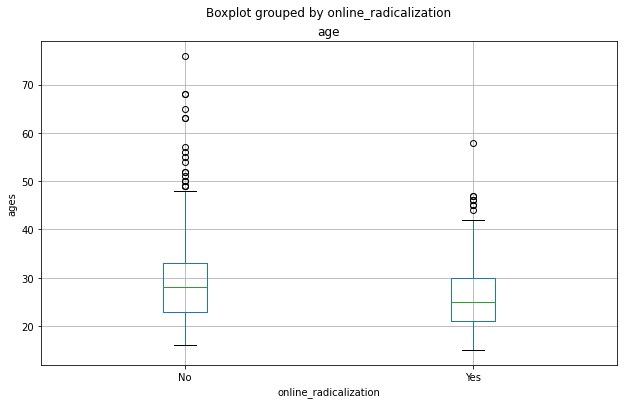

In [24]:
#boxplot illustration
#shows how the ages range and the outliers more clearly
suspects.boxplot('age', by='online_radicalization', figsize=(10,6))
plt.ylabel('ages')
plt.show()


[[Text(0, 0, 'yes online rad'), Text(0, 0, 'no online rad')]]

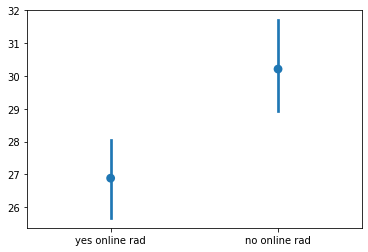

In [26]:
#pointplot
#will show the central tendency of ages between yes online radicalization 
#or no online radicalization
g = sns.pointplot(data=[yes['age'],
                        no['age']], join=False)
                        
g.set(xticklabels = ['yes online rad', 'no online rad'])


Our variables that could have been tested to see if there were differences are online radicalization and plot status. These are two binary variables with no continuous data, so tests would need to be different to determine if have differences. Also marital status could have been one of the variables to test. Married and Unmarried are the two most common values within the column. Another thought is to make a seperate column featuring just the year of the plots to determine how the counts have changed throughout the years.

Metadata:

suspect_ID
* id for suspect in dataframe

age 
* suspect's age

sex
* suspect's sex (Female/Male)

marital_status 
* the marital_status of suspect

plot_ID
* connects to the plot ID in plots dataframe for the suspect

military_target
* yes or no if target was military

online_radicalization
* yes or no if influenced by online radicalization

from **plots** dataframe:

plot_ID 
* id for plot in dataframe

plot_name 
* name for attack (includes year and name)

plot_ideology 
* ideology claimed for plot

plot_status    
* if plot was prevented or not

victims_wounded  
* number of victims wounded in plot

victims_killed
* number of victims killed in plot
